# Comparing the convergence of the following algorithms

### -Policy Iteration

### -Value Iteration

### -Policy Gradient with Direct Parameterization (Constant step-size)

### -Policy Gradient with Direct Parameterization (Time variant step-size)

### -Policy Gradient with Softmax Parameterization (Constant step-size)

### -Policy Gradient with Softmax Parameterization (Time variant step-size)

In [1]:
import MarkovDP as mdp 
import directparam as dp
import softmaxparam as smp
import policy_value_iteration as pvi
import numpy as np
import sys
import time
import warnings
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')

## Define MDP

In [2]:
'''
Define an MDP Environment : Insantiate Class
    Number of states : s
    Number of actions : a
'''

s=3
a=2
env1= mdp.MarkovDP(s,a)      #Define an MDP Environment : Insantiate Class
env1.initialize_mdp()    #Define P and R

## Initialize parameters

In [3]:
gamma = 0.9       #Discount rate
theta = 0.0001    #A small positive number
rho= np.ones(env1.num_state)/env1.num_state

## Policy Iteration

In [4]:
V_policy,pi_policy,history_policy,history_policy_time= pvi.policy_iteration(env1, gamma, theta)

Total number of iterations: 3


## Value Iteration

In [5]:
V_value,pi_value,history_value,history_value_time = pvi.value_iteration(env1, gamma, theta)

Total number of iterations: 45


## Direct Parameterization; step-size=0.02

In [6]:
iterations=800
learning_rate=0.02
pi_dp1,V_dp1,history_dp1,history_time_dp1=dp.policy_gradient(env1,gamma,theta,rho,iterations,learning_rate)

## Direct Parameterization; step-size=0.002

In [7]:
iterations=2000
learning_rate=0.002
pi_dp2,V_dp2,history_dp2,history_time_dp2=dp.policy_gradient(env1,gamma,theta,rho,iterations,learning_rate)

## SoftMax Parameterization; step-size=0.02

In [8]:
iterations=2000
learning_rate=0.02

pi_smp_constep1,V_smp_constep1,history_smp_constep1,history_smp_time_constep1=smp.policy_gradient_constant_step(env1,gamma,theta,rho,iterations,learning_rate)

## SoftMax Parameterization; step-size=0.2

In [9]:
iterations=200
learning_rate=0.2

pi_smp_constep2,V_smp_constep2,history_smp_constep2,history_smp_time_constep2=smp.policy_gradient_constant_step(env1,gamma,theta,rho,iterations,learning_rate)

## SoftMax Parameterization; step-size= 1/t

In [10]:
iterations=100
alpha=1
pi_smp_vstep1,V_smp_vstep1,history_smp_vstep1,history_smp_time_vstep1=smp.policy_gradient_variant_step(env1,gamma,theta,rho,iterations,alpha)

## SoftMax Parameterization; step-size=1/ t<sup>0.5</sup>

In [11]:
iterations=200
alpha=0.5
pi_smp_vstep2,V_smp_vstep2,history_smp_vstep2,history_smp_time_vstep2=smp.policy_gradient_variant_step(env1,gamma,theta,rho,iterations,alpha)

## SoftMax Parameterization; step-size=1/t<sup>0.3</sup>

In [12]:
iterations=200
alpha=0.3
pi_smp_vstep3,V_smp_vstep3,history_smp_vstep3,history_smp_time_vstep3=smp.policy_gradient_variant_step(env1,gamma,theta,rho,iterations,alpha)

## Comparing Covergence wrt time

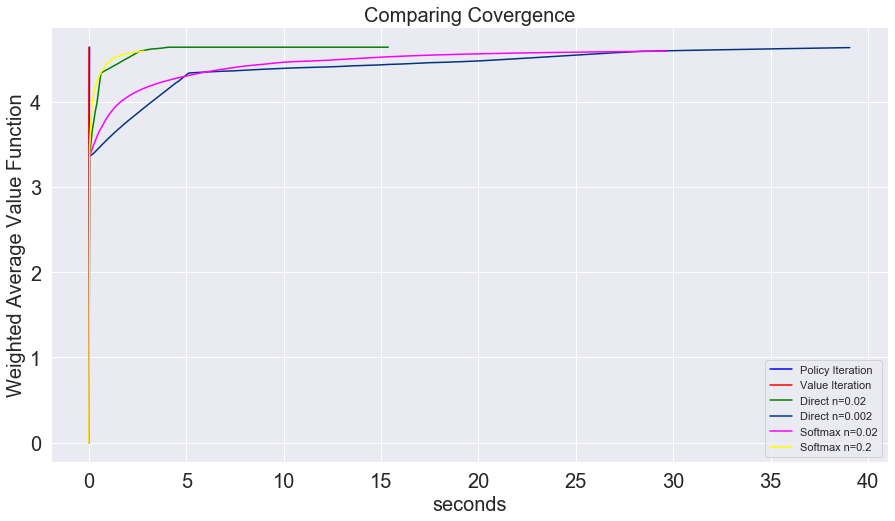

In [14]:
plot_p = list()
plot_v = list()
plot_dp1 =list()
plot_dp2 =list()
plot_smpc1 =list()
plot_smpc2 =list()
plot_smpv1 =list()
plot_smpv2 =list()
plot_smpv3 =list()
for i in range(0,len(history_policy)):
    plot_p.append(np.dot(rho,history_policy[i]))
for i in range(0,len(history_value)):
    plot_v.append(np.dot(rho,history_value[i]))
for i in range(0,len(history_dp1)):
    plot_dp1.append(np.dot(rho,history_dp1[i]))
for i in range(0,len(history_dp2)):
    plot_dp2.append(np.dot(rho,history_dp2[i]))
for i in range(0,len(history_smp_constep1)):
    plot_smpc1.append(np.dot(rho,history_smp_constep1[i]))
for i in range(0,len(history_smp_constep2)):
    plot_smpc2.append(np.dot(rho,history_smp_constep2[i]))
for i in range(0,len(history_smp_vstep1)):
    plot_smpv1.append(np.dot(rho,history_smp_vstep1[i]))
for i in range(0,len(history_smp_vstep2)):
    plot_smpv2.append(np.dot(rho,history_smp_vstep2[i]))
for i in range(0,len(history_smp_vstep3)):
    plot_smpv3.append(np.dot(rho,history_smp_vstep3[i]))
    #labels = range(max(len(history_policy,history_value)))
    #plt.xticks(range(len(labels)), labels)
plt.tick_params(axis='y',labelsize=20)
plt.tick_params(axis='x',labelsize=20)
plt.xlabel('seconds', fontsize=20)
plt.ylabel('Weighted Average Value Function', fontsize=20)
plt.plot(history_policy_time,plot_p,color='blue', label='Policy Iteration') 
plt.plot(history_value_time,plot_v, color='red', label='Value Iteration') 
plt.plot(history_time_dp1,plot_dp1, color='green', label='Direct n=0.02') 
plt.plot(history_time_dp2,plot_dp2, color=(0,0.2,0.5), label='Direct n=0.002')
plt.plot(history_smp_time_constep1,plot_smpc1, color='magenta', label='Softmax n=0.02')
plt.plot(history_smp_time_constep2,plot_smpc2, color='yellow', label='Softmax n=0.2')
#plt.plot(history_smp_time_vstep1,plot_smpv1, color='black', label='Softmax n=1/t')
#plt.plot(history_smp_time_vstep2,plot_smpv2, color='0.5', label='Softmax n=1/sqrt(t)')
#plt.plot(history_smp_time_vstep3,plot_smpv3, color='#ffa500', label='Softmax n=1/(t^0.3)')


title= 'Comparing Covergence'
plt.title(title,fontsize=20)
fig_size=(15,8)
plt.rcParams["figure.figsize"] = fig_size
plt.legend(loc='best') 
plt.show()

## Comparing Covergence wrt iterations

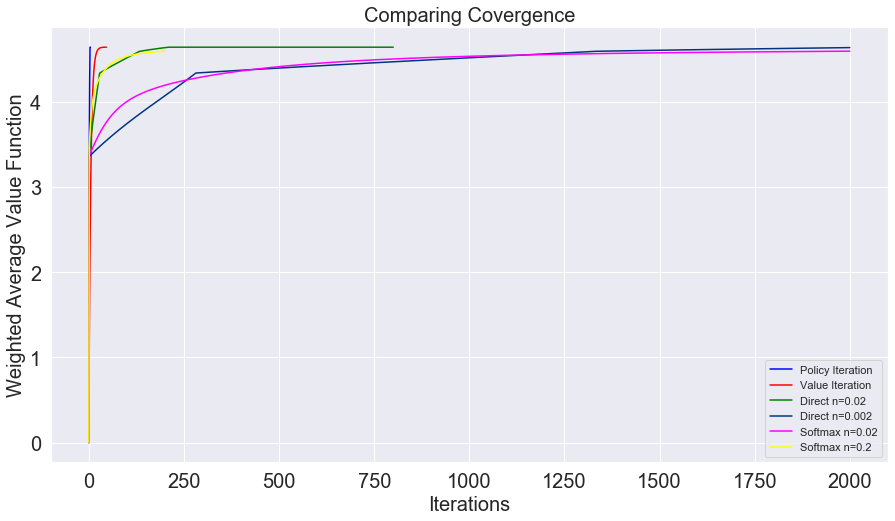

In [15]:
plot_p = list()
plot_v = list()
plot_dp1 =list()
plot_dp2 =list()
plot_smpc1 =list()
plot_smpc2 =list()
plot_smpv1 =list()
plot_smpv2 =list()
plot_smpv3 =list()
for i in range(0,len(history_policy)):
    plot_p.append(np.dot(rho,history_policy[i]))
for i in range(0,len(history_value)):
    plot_v.append(np.dot(rho,history_value[i]))
for i in range(0,len(history_dp1)):
    plot_dp1.append(np.dot(rho,history_dp1[i]))
for i in range(0,len(history_dp2)):
    plot_dp2.append(np.dot(rho,history_dp2[i]))
for i in range(0,len(history_smp_constep1)):
    plot_smpc1.append(np.dot(rho,history_smp_constep1[i]))
for i in range(0,len(history_smp_constep2)):
    plot_smpc2.append(np.dot(rho,history_smp_constep2[i]))
for i in range(0,len(history_smp_vstep1)):
    plot_smpv1.append(np.dot(rho,history_smp_vstep1[i]))
for i in range(0,len(history_smp_vstep2)):
    plot_smpv2.append(np.dot(rho,history_smp_vstep2[i]))
for i in range(0,len(history_smp_vstep3)):
    plot_smpv3.append(np.dot(rho,history_smp_vstep3[i]))
    #labels = range(max(len(history_policy,history_value)))
    #plt.xticks(range(len(labels)), labels)
plt.tick_params(axis='y',labelsize=20)
plt.tick_params(axis='x',labelsize=20)
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('Weighted Average Value Function', fontsize=20)
plt.plot(range(len(history_policy_time)),plot_p,color='blue', label='Policy Iteration') 
plt.plot(range(len(history_value_time)),plot_v, color='red', label='Value Iteration') 
plt.plot(range(len(history_time_dp1)),plot_dp1, color='green', label='Direct n=0.02') 
plt.plot(range(len(history_time_dp2)),plot_dp2, color=(0,0.2,0.5), label='Direct n=0.002')
plt.plot(range(len(history_smp_time_constep1)),plot_smpc1, color='magenta', label='Softmax n=0.02')
plt.plot(range(len(history_smp_time_constep2)),plot_smpc2, color='yellow', label='Softmax n=0.2')
#plt.plot(range(len(history_smp_time_vstep1)),plot_smpv1, color='black', label='Softmax n=1/t')
#plt.plot(range(len(history_smp_time_vstep2)),plot_smpv2, color='0.5', label='Softmax n=1/sqrt(t)')
#plt.plot(range(len(history_smp_time_vstep3)),plot_smpv3, color='#ffa500', label='Softmax n=1/(t^0.3)')


title= 'Comparing Covergence'
plt.title(title,fontsize=20)
fig_size=(15,8)
plt.rcParams["figure.figsize"] = fig_size
plt.legend(loc='best') 
plt.show()